# All Plots

In [111]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import datetime
from dateutil import parser

% matplotlib inline

In [5]:
# for the top 20 stations, total turnstile counts by day of the week 
with open('turnstile_160507.txt') as f:
    turnstiles1 = pd.read_csv(f)
with open('turnstile_160514.txt') as f:
    turnstiles2 = pd.read_csv(f)
with open('turnstile_160521.txt') as f:
    turnstiles3 = pd.read_csv(f)
with open('turnstile_160528.txt') as f:
    turnstiles4 = pd.read_csv(f)

In [6]:
turnstiles = pd.concat([turnstiles1, turnstiles2, turnstiles3, turnstiles4], ignore_index = True)

## Cleaning and Aggregating Data for All Plots

In [7]:
# stripping trailing whitespaces - warning - takes forever!
turnstiles.columns = turnstiles.columns.str.strip()

In [8]:
# warning - takes forever due to parser.parse
turnstiles['DATETIME'] = turnstiles['DATE'] + ' ' + turnstiles['TIME']
turnstiles['DATETIME'] = turnstiles['DATETIME'].apply(parser.parse)

In [9]:
turnstiles['WEEKDAY'] = turnstiles['DATETIME'].apply(lambda x: x.weekday())

In [10]:
turnstiles

,C/A,UNIT,SCP,STATION,LINENAME,DIVISION,DATE,TIME,DESC,ENTRIES,EXITS,DATETIME,WEEKDAY
0,A002,R051,02-00-00,59 ST,NQR456,BMT,04/30/2016,00:00:00,REGULAR,5639941,1909983,2016-04-30 00:00:00,5
1,A002,R051,02-00-00,59 ST,NQR456,BMT,04/30/2016,04:00:00,REGULAR,5639991,1909993,2016-04-30 04:00:00,5
2,A002,R051,02-00-00,59 ST,NQR456,BMT,04/30/2016,08:00:00,REGULAR,5640014,1910024,2016-04-30 08:00:00,5
3,A002,R051,02-00-00,59 ST,NQR456,BMT,04/30/2016,12:00:00,REGULAR,5640158,1910134,2016-04-30 12:00:00,5
4,A002,R051,02-00-00,59 ST,NQR456,BMT,04/30/2016,16:00:00,REGULAR,5640454,1910197,2016-04-30 16:00:00,5
5,A002,R051,02-00-00,59 ST,NQR456,BMT,04/30/2016,20:00:00,REGULAR,5640802,1910254,2016-04-30 20:00:00,5
6,A002,R051,02-00-00,59 ST,NQR456,BMT,05/01/2016,00:00:00,REGULAR,5640974,1910328,2016-05-01 00:00:00,6
7,A002,R051,02-00-00,59 ST,NQR456,BMT,05/01/2016,04:00:00,REGULAR,5640996,1910333,2016-05-01 04:00:00,6
8,A002,R051,02-00-00,59 ST,NQR456,BMT,05/01/2016,08:00:00,REGULAR,5641021,1910358,2016-05-01 08:00:00,6
9,A002,R051,02-00-00,59 ST,NQR456,BMT,05/01/2016,12:00:00,REGULAR,5641113,1910427,2016-05-01 12:00:00,6


In [19]:
first = turnstiles.groupby(['STATION','C/A','UNIT','SCP','DATETIME']).sum()

In [28]:
first['INCREM_ENTRIES'] = first['ENTRIES'].diff(periods=-1).abs()
first['INCREM_EXITS'] = first['EXITS'].diff(periods=-1).abs()
first['TOTAL'] = first['INCREM_ENTRIES'] + first['INCREM_EXITS']

In [48]:
second = first[(first['TOTAL'] < 5000) & (first['TOTAL'] > 0)]

## Code for Plot 1 and Plot 2

In [50]:
third = second[['WEEKDAY', 'INCREM_ENTRIES', 'INCREM_EXITS', 'TOTAL']]

In [85]:
fourth = third.reset_index().groupby(['STATION','WEEKDAY']).sum().reset_index()

In [86]:
fourth

,STATION,WEEKDAY,INCREM_ENTRIES,INCREM_EXITS,TOTAL
0,1 AV,0,94368.0,96147.0,190515.0
1,1 AV,1,99982.0,100379.0,200361.0
2,1 AV,2,102910.0,103013.0,205923.0
3,1 AV,3,103199.0,102422.0,205621.0
4,1 AV,4,101331.0,104549.0,205880.0
5,1 AV,5,81795.0,84791.0,166586.0
6,1 AV,6,60091.0,63420.0,123511.0
7,103 ST,0,120857.0,63458.0,184315.0
8,103 ST,1,126438.0,67122.0,193560.0
9,103 ST,2,119276.0,62284.0,181560.0


In [63]:
station_list = list(set([k for k, v in fourth.index]))

## Pickup Plot 1

In [87]:
fifth = fourth.groupby(['STATION']).sum()[['INCREM_ENTRIES', 'INCREM_EXITS', 'TOTAL']]

In [88]:
sixth = fifth.sort_values(by = 'TOTAL', ascending = False).head(10).reset_index()

In [89]:
sixth

,STATION,INCREM_ENTRIES,INCREM_EXITS,TOTAL
0,34 ST-PENN STA,4213363.0,3585454.0,7798817.0
1,GRD CNTRL-42 ST,3578559.0,3160472.0,6739031.0
2,34 ST-HERALD SQ,3079692.0,2719583.0,5799275.0
3,23 ST,3051669.0,2304326.0,5355995.0
4,86 ST,2820359.0,2361427.0,5181786.0
5,14 ST-UNION SQ,2759008.0,2377425.0,5136433.0
6,TIMES SQ-42 ST,2495836.0,2271201.0,4767037.0
7,42 ST-PORT AUTH,2657407.0,1865145.0,4522552.0
8,125 ST,2184329.0,1607660.0,3791989.0
9,59 ST,2036007.0,1627382.0,3663389.0


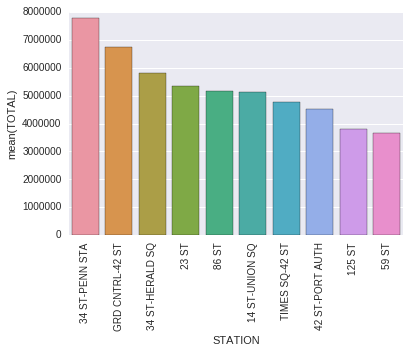

In [90]:
sns.barplot(x = 'STATION', y = 'TOTAL', data = sixth)
plt.xticks(rotation=90);

## Pickup Plot 2

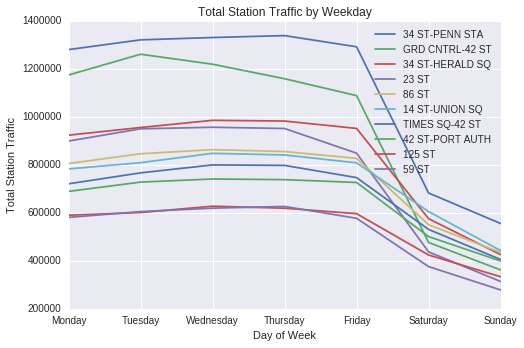

In [96]:
# for each station, plot the traffic by weekday
fig = plt.figure()

x = range(0,7)
axes = fig.add_axes([0, 0, 1, 1])

for station in list(sixth['STATION']):
    y = fourth[fourth['STATION'] == station]['TOTAL']
    axes.plot(x, y, label = station)

axes.set_xlabel('Day of Week') # Notice the use of set_ to begin methods
axes.set_ylabel('Total Station Traffic')
axes.set_title('Total Station Traffic by Weekday')
axes.set_xticklabels(['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'])
axes.legend();

## Plot 3

In [255]:
top_stations = list(sixth['STATION'])

In [199]:
# looking at only weekdays
seventh = second.reset_index()
eighth = seventh[seventh['WEEKDAY'] < 6].copy()

In [200]:
# isolating a time column
eighth['TIME'] = eighth['DATETIME'].apply(lambda x: x.time())

In [209]:
# isolating top stations and summing across weekday by station and time
ninth = eighth.groupby(['STATION','TIME']).sum()[['INCREM_ENTRIES','INCREM_EXITS','TOTAL']].loc[top_stations]

In [221]:
# calculating the cumulative times for each station
tenth = ninth.groupby(level = [0]).cumsum().reset_index()

In [223]:
# generating a list of time buckets
time_list = [datetime.time(0,0), datetime.time(4,0), datetime.time(8,0), datetime.time(12,0), datetime.time(16,0),
             datetime.time(20,0)]

In [235]:
# isolating cumulative times to those in time list
eleventh = tenth[tenth['TIME'].isin(time_list)].copy()

In [245]:
# recalculating incrementals
eleventh['ENTRIES'] = eleventh['INCREM_ENTRIES'].diff()
eleventh['EXITS'] = eleventh['INCREM_EXITS'].diff()
eleventh['PERIOD TOTAL'] = eleventh['TOTAL'].diff()

In [248]:
# throwing away midnight time frame
twelfth = eleventh[eleventh['TIME'] != datetime.time(0,0)]

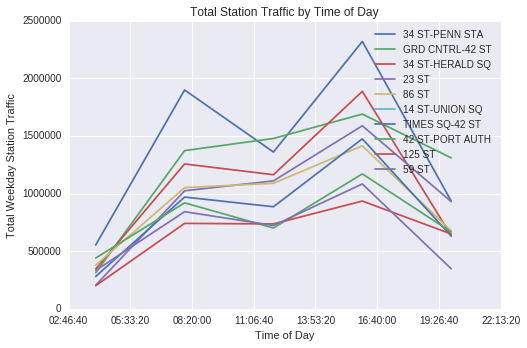

In [267]:
# for each station, plot the traffic by time of day
fig = plt.figure()

axes = fig.add_axes([0, 0, 1, 1])

for station in top_stations:
    x = twelfth[twelfth['STATION'] == station]['TIME']
    y = twelfth[twelfth['STATION'] == station]['PERIOD TOTAL']
    axes.plot(x, y, label = station)

axes.set_xlabel('Time of Day') 
axes.set_ylabel('Total Weekday Station Traffic')
axes.set_title('Total Station Traffic by Time of Day')
axes.legend();